In [ ]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer
from scouting_gym.scouting_env_real import ScoutingEnvInference
from gym.envs.registration import register
from IPython.display import clear_output

register(
    id='Scouting-inference-v0',
    entry_point='scouting_gym.scouting_env_real:ScoutingEnvInference'
)

## Create Inference Environment

In [2]:
env = gym.make('Scouting-inference-v0')
print(env.observation_space)


Box(0.0, 1.0, (84, 84, 4), float32)


## Get state based on target
Set target relativ to robot

1.0


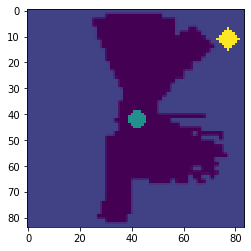

In [3]:
env.target_p = (-4, -4.9)
import matplotlib.pyplot as plt
obs = env.reset()
print(obs.max())
plt.imshow(obs[:, :, 0])


## Start Ray

In [4]:
ray.init()

2021-03-03 08:53:37,276	INFO resource_spec.py:223 -- Starting Ray with 7.76 GiB memory available for workers and up to 3.89 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-03-03 08:53:37,879	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.33.3',
 'raylet_ip_address': '192.168.33.3',
 'redis_address': '192.168.33.3:6379',
 'object_store_address': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2021-03-03_08-53-37_272686_3609'}

In [5]:
train_config = {
    "env": NavigationDiscreteTask,
    "lr": 0.0001,
    "gamma": 0.99,
    "clip_rewards": None,
    "clip_actions": True,
    "num_gpus": 1,
    "num_workers": 1,
    "model": {"dim": 84,
              "conv_filters":
                  [[16, [8, 8], 4], [32, [4, 4], 2], [256, [11, 11], 1]]}
}

In [6]:
def load(checkpoint_path, config):
    """
    Load a trained RLlib agent from the specified path. Call this before testing a trained agent.
    :param path: Path pointing to the agent's saved checkpoint (only used for RLlib agents)
    """
    agent = PPOTrainer(config=config)
    agent.restore(checkpoint_path)
    return agent

def test(agent, env):
    """Test trained agent for a single episode. Return the episode reward"""
    # instantiate env class

    # run until episode ends
    episode_reward = 0
    done = False
    obs = env.reset()
    while not done:
        action = agent.compute_action(obs)
        obs, reward, done, info = env.step(action)
        clear_output(wait=True)
        episode_reward += reward
    env.reset()
    return episode_reward

## Load trained Agent

In [ ]:
checkpoint_path = '/home/dschori/Downloads/checkpoint_164/checkpoint-164'
agent = load(checkpoint_path=checkpoint_path, config=config)

## Set Target

In [26]:
env.target_p = (-1.35, -1.55)
env.img_prefix = 'd2_17'

## Run Agent

In [ ]:
episode_reward = test(agent=agent, env=env)
print(episode_reward)